# Juntando R y Python

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import rpy2

In [4]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

In [5]:
#Activar conversión de tipos de datos
rpy2.robjects.numpy2ri.activate()

In [6]:
#Codigo de R
codigo_r = """
saludar <- function(cadena){
    return(paste("Hola, ", cadena))
}
"""

In [7]:
ro.r(codigo_r)

R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x0000025A466E2D88 / R:0x0000025A549ACBF0>

In [8]:
#equivalente en python
saludar_py = ro.globalenv["saludar"]

In [9]:
res = saludar_py("Antonio Banderas")
res[0]

'Hola,  Antonio Banderas'

In [10]:
type(res)

rpy2.robjects.vectors.StrVector

In [11]:
print(saludar_py.r_repr())

function (cadena) 
{
    return(paste("Hola, ", cadena))
}


In [12]:
var_from_python = ro.FloatVector(np.arange(1,5,0.1))

In [13]:
var_from_python

1.000000,1.100000,1.200000,1.300000,...,4.600000,4.700000,4.800000,4.900000


In [14]:
print(var_from_python.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [15]:
ro.globalenv["var_to_r"] = var_from_python

In [16]:
ro.r("var_to_r")

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [17]:
ro.r("sum(var_to_r)")

array([118.])

In [18]:
ro.r("mean(var_to_r)")

array([2.95])

In [19]:
ro.r("sd(var_to_r)")

array([1.16904519])

In [20]:
np.sum(var_from_python)

118.00000000000007

In [21]:
np.mean(var_from_python)

2.950000000000002

In [22]:
ro.r("summary(var_to_r)")

array([1.   , 1.975, 2.95 , 2.95 , 3.925, 4.9  ])

In [90]:
#generar graficos en nuevas ventanas genera errores- evitar y generarlos directo en el notebook (Rmagic)
#ro.r("hist(var_to_r, breaks=4)")

# Trabajar de forma conjunta entre R y Python

In [23]:
#importar paquetes de R
from rpy2.robjects.packages import importr

In [27]:
ro.r("install.packages('extRemes')")
extremes = importr("extRemes")#library(extRemes) equivalente

In [28]:
fevd = extremes.fevd

In [41]:
print(fevd.__doc__)

Python representation of an R function.
description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector - Python:0x0000025A64484070 / R:0x0000025A5C9B0F00>,
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

x :  `fevd`: `x` can be a numeric vector, the name of a column of `data` or a formula giving the data t

In [42]:
mainpath = "C:/Users/Esneider Infante/Documentos/Python Machine Learning Udemy/python-ml-course/datasets/"
filename = "time/time_series.txt"
fullpath = mainpath+filename
data = pd.read_csv(fullpath, sep="\s+", skiprows = 1, names=["date","time","wind_speed"],parse_dates=[[0,1]],
              index_col=0)

In [43]:
data.head()

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [44]:
data.shape

(275352, 1)

In [49]:
max_ws = data.wind_speed.groupby(pd.Grouper(freq="A")).max()

In [50]:
max_ws

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

<AxesSubplot:xlabel='date_time'>

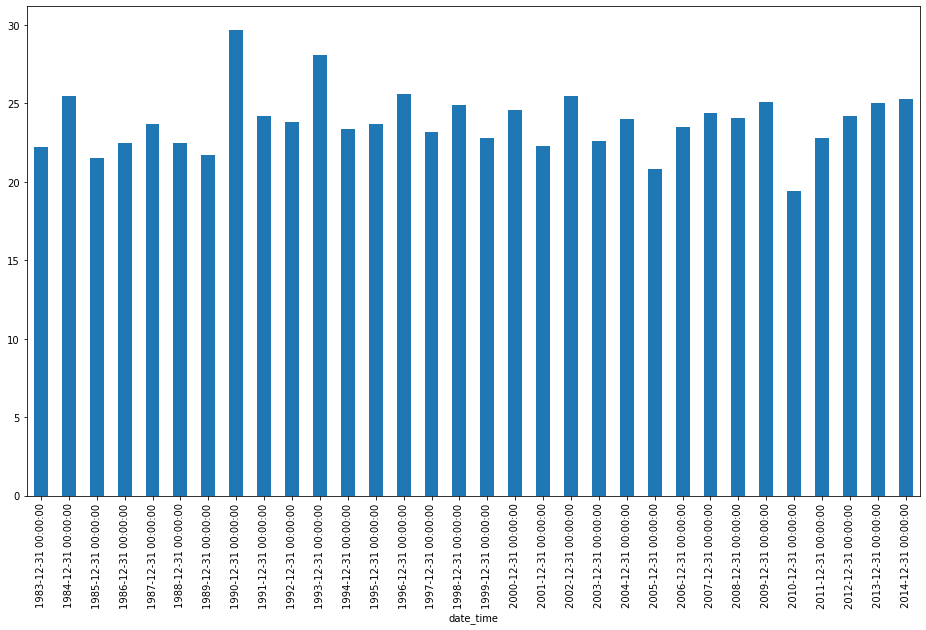

In [51]:
max_ws.plot(kind="bar", figsize=(16,9))

In [57]:
#Ajuste de Máxima Verosimilitud
result = fevd(max_ws.values,type="GEV", method="GMLE")

In [53]:
print(type(result))

<class 'rpy2.robjects.vectors.ListVector'>


In [54]:
result.r_repr

<bound method RObjectMixin.r_repr of R object with classes: ('fevd',) mapped to:
<ListVector - Python:0x0000025A62ABA7C8 / R:0x0000025A5883E028>
[Vector, StrVector, FloatVector, Array, ..., StrVector, StrVector, ListVector, ListVector]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('fevd',) mapped to:
<Vector - Python:0x0000025A62A36108 / R:0x0000025A565FEC20>
[SignatureT..., Array, StrVector, StrVector]
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x0000025A62A36608 / R:0x0000025A5CD2AA00>
['struct..., '23.8, ..., '22.6, ..., '25.3),..., '']
  weights: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000025A62A62D88 / R:0x0000025A5C1F0FD8>
[1.000000]
  missing.values: <class 'rpy2.robjects.vectors.Array'>
  R object with classes: ('array',) mapped to:
<Array - Python:0x0000025A62C29348 / R:0x0000025A5CBB0018>
[ 

In [56]:
print(result.names)

 [1] "call"            "data.name"       "weights"         "missing.values" 

 [5] "in.data"         "x"               "priorFun"        "priorParams"    

 [9] "method"          "type"            "period.basis"    "par.models"     

[13] "const.loc"       "const.scale"     "const.shape"     "n"              

[17] "na.action"       "parnames"        "results"         "initial.results"



In [63]:
res = result.rx("results")
print(res[0])

$par

  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



$value

[1] 1e+16



$counts

function gradient 

       1        1 



$convergence

[1] 0



$message

NULL



$hessian

         location scale shape

location        0     0     0

scale           0     0     0

shape           0     0     0



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







In [66]:
loc, scale, shape = res[0].rx("par")[0]

In [67]:
loc

23.063941519915588

In [68]:
scale

1.7576912874286317

In [69]:
shape

-0.1628816367714792

# Función mágica para R

In [72]:
%load_ext rpy2.ipython

In [73]:
help(rpy2.ipython.rmagic.RMagics.R)

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE]
             [-b BG] [--noisolation] [-u {px,in,cm,mm}] [-r RES] [-c CONVERTER]
             [code [code ...]]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R REPL.
    
    Nothing is returned to python by default in cell mode::

In [74]:
%R X=c(1,4,5,7); sd(X); mean(X)

array([4.25])

In [85]:
%%R
Y = c(2,4,3,9)
summary(lm(Y~X))

In [86]:
print(ro.r("summary(lm)"))



Call:

lm(formula = Y ~ X)



Residuals:

    1     2     3     4 

 0.88 -0.24 -2.28  1.64 



Coefficients:

            Estimate Std. Error t value Pr(>|t|)

(Intercept)   0.0800     2.3000   0.035    0.975

X             1.0400     0.4822   2.157    0.164



Residual standard error: 2.088 on 2 degrees of freedom

Multiple R-squared:  0.6993,	Adjusted R-squared:  0.549 

F-statistic: 4.651 on 1 and 2 DF,  p-value: 0.1638





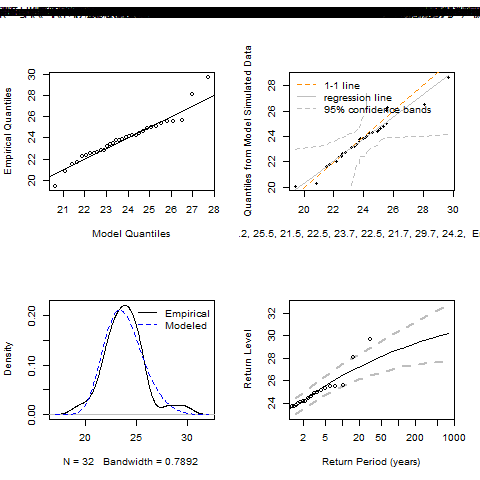

In [87]:
%R -i result plot.fevd(result)

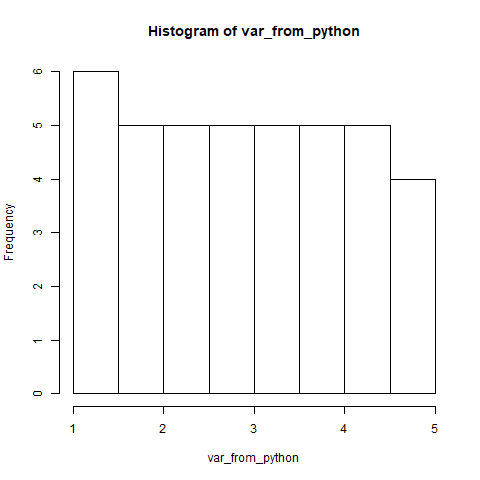

R object with classes: ('histogram',) mapped to:
<ListVector - Python:0x0000025A62FEAA88 / R:0x0000025A5B47B540>
[Float..., IntVe..., Float..., Float..., StrVe..., BoolV...]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000025A633673C8 / R:0x0000025A58E29A48>
[1.000000, 1.500000, 2.000000, 2.500000, ..., 3.500000, 4.000000, 4.500000, 5.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x0000025A63069708 / R:0x0000025A58D81E88>
[6, 5, 5, 5, 5, 5, 5, 4]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000025A63075E88 / R:0x0000025A5B47B070>
[0.300000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.200000]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000025A6338DE08 / R:0x0000025A5B47B310>
[1.250000, 1.750000, 2.250000, 2.750000, 3.250000, 3.750000, 4.250000, 4.750000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x0000025A63065888 / R:0x0000025A5659D168>
['var_from_python']
  equidist: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x0000025A6335D8C8 / R:0x0000025A54D83E10>
[       1]

In [88]:
%R -i var_from_python hist(var_from_python)

# Un ejemplo complejo de R, Python y Rmagic

In [100]:
metodos = ["MLE", "GMLE"]
tipos = ["GEV","Gumbel"]

Tipo de Ajuste:  GEV
Método del ajuste:  MLE
$par

  location      scale      shape 

23.0517078  1.8085853 -0.1497984 



$value

[1] 66.22729



$counts

function gradient 

      28        6 



$convergence

[1] 0



$message

NULL



$hessian

           location      scale     shape

location  9.1825628 -0.3982934  11.22038

scale    -0.3982934 21.4422632  19.81854

shape    11.2203805 19.8185358 172.17411



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







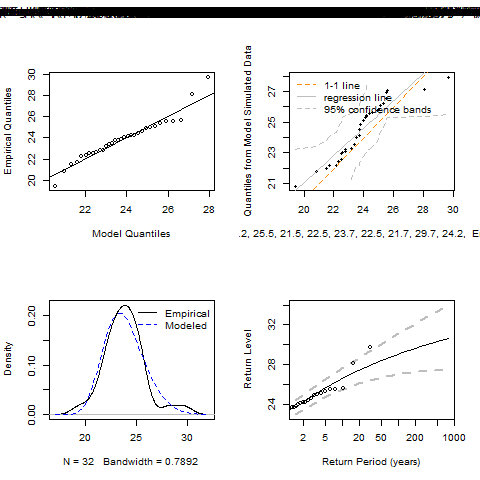

Tipo de Ajuste:  GEV
Método del ajuste:  GMLE
$par

  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



$value

[1] 1e+16



$counts

function gradient 

       1        1 



$convergence

[1] 0



$message

NULL



$hessian

         location scale shape

location        0     0     0

scale           0     0     0

shape           0     0     0



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







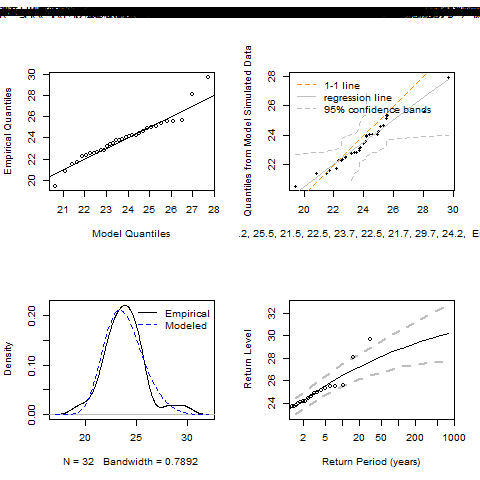

Tipo de Ajuste:  Gumbel
Método del ajuste:  MLE
$par

 location     scale 

22.905876  1.814452 



$value

[1] 67.38487



$counts

function gradient 

      14        5 



$convergence

[1] 0



$message

NULL



$hessian

          location     scale

location  9.719762 -4.762621

scale    -4.762621 21.535378



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

NULL







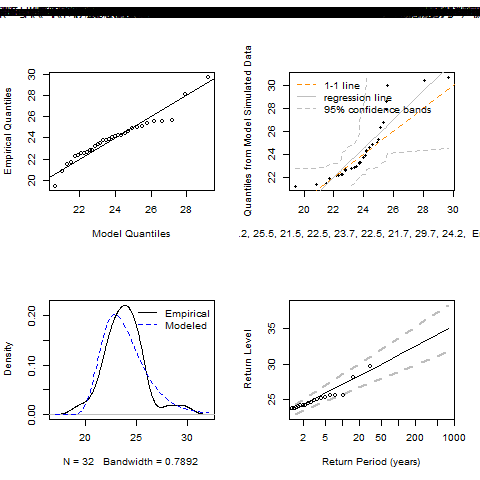

Tipo de Ajuste:  Gumbel
Método del ajuste:  GMLE
$par

 location     scale 

22.905876  1.814452 



$value

[1] 67.38487



$counts

function gradient 

      14        5 



$convergence

[1] 0



$message

NULL



$hessian

          location     scale

location  9.719762 -4.762621

scale    -4.762621 21.535378



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

NULL







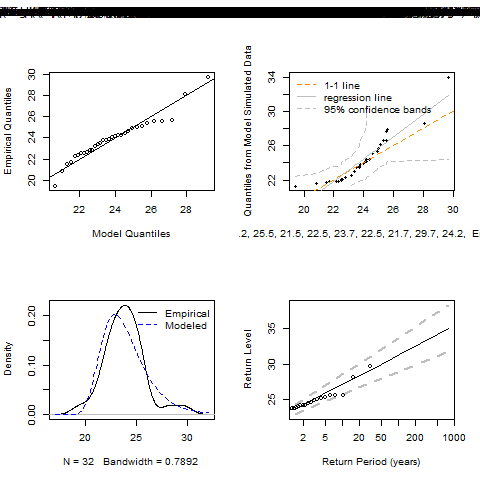

In [101]:
for t in tipos:
    for m in metodos:
        print("Tipo de Ajuste: ",t)
        print("Método del ajuste: ", m)
        result = fevd(max_ws.values, method=m, type=t)
        print(result.rx("results")[0])
        %R -i result plot.fevd(result)

In [102]:
#stat.ncsu.edu/research/sas/sicl/data/
#https://archive.ics.uci.edu/ml/datasets.php